In [8]:
from google.colab import files
uploaded = files.upload()

Saving cartoonising_input2.png to cartoonising_input2.png


In [9]:
print(uploaded)

{'cartoonising_input2.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf1\x00\x00\x01L\x08\x06\x00\x00\x00\xdbf\x85\xd6\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x12t\x00\x00\x12t\x01\xdef\x1fx\x00\x00\xff\xa5IDATx^\x9c\xfdi\x93$I\x92\x1d\x08>9\xf50s\xf7\x88\xcc\xaa\x0150?pi\x07D;\xb3D;\x03,\x1aK\xf57\xf7\x0b\xd0\xddU\x95\x99q\xf9afz\xc9\xb9\x1f\x1e\x8b\x9az\xe4Q\xc0j\x90\x86\x9b\xa9\xe9!"*\xc2\xe7cf\xb5\xcd\xffR\x8d\xd6PZC+\x8dZ+RN\x881 \x86\x80\x10#R\x8a(%\x03\xaaB\xa1\x02\nP\xb2\xb7\xcd\xda\x1eF\xfb\xfb\x81\xef6\xad\xf5\xf7\x87\xf6\xcdY\x0fk;\xb9\x9f\x82RU>\xf3Y\xc6h\xc4\x18\xb0n\x0b\xb6uE\x8c\x11\x15\xad-\nZ+(\xa5\xa1\x94\x82\xd6\x86\xbb2PJ\xa1\xd6\x8aZ\x15\x80\xd6X\x05\xd5:P+\x80\n\xa5\x15\xb4\xd60\xc6\xc0\x18\x03\xad5\xb4R\xa8\x00P+J\xadH)!\xc6\x88\xb0\x05\x84\x18PJ\x80\xb6\x89m\x94\xbbB)(h\x00\n\xceyhm\xe4\xb9|\xb6\xda?\xdfwvYA)\xf9\x0c\x05\xdfyh\xad\x91SFJ\x11!F\xc4\x18\x91RB)\x05\xa5\x14\xf4]\x87\

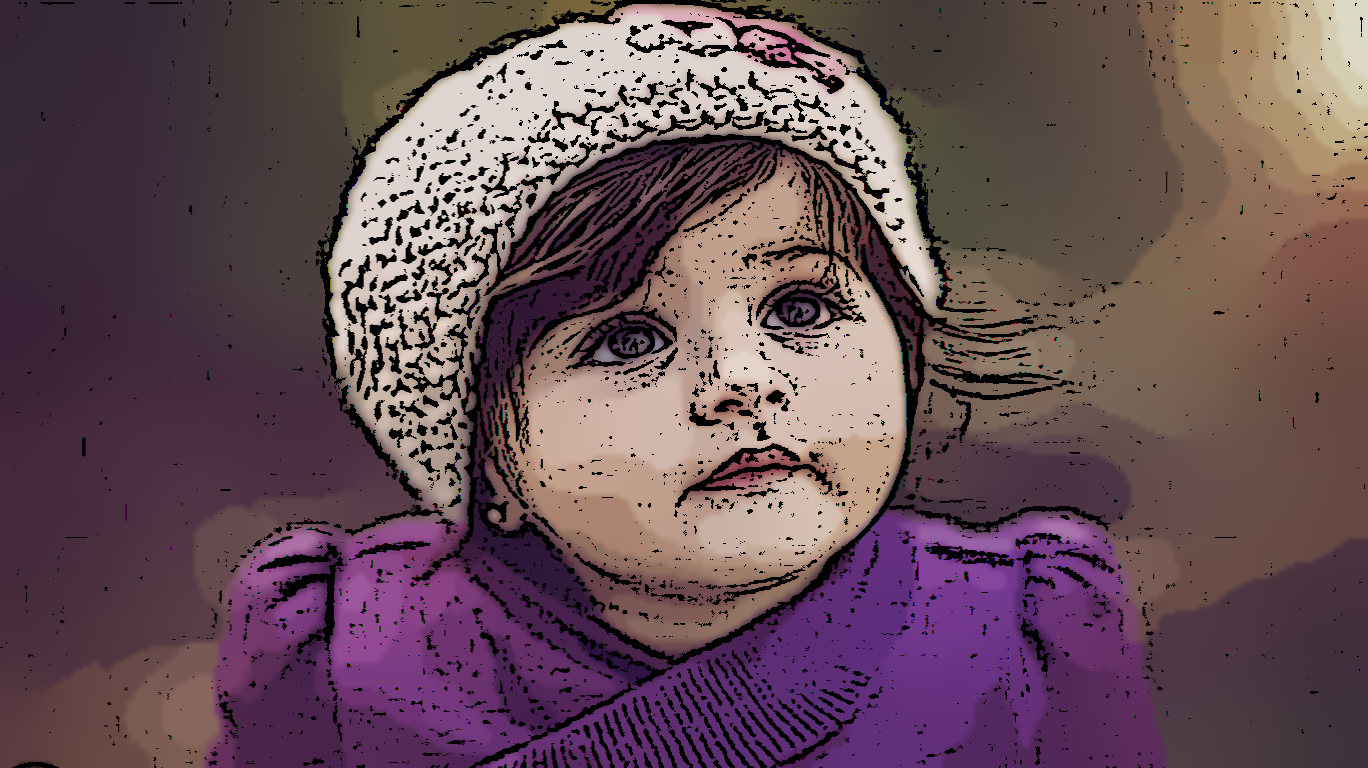

In [11]:
import cv2
from google.colab.patches import cv2_imshow
class Cartoonizer:
 """Cartoonizer effect
  A class that applies a cartoon effect to an image.
  The class uses a bilateral filter and adaptive thresholding to create
  a cartoon effect.
 """
 def __init__(self):
  pass

 def render(self, img_rgb):
  img_rgb = cv2.imread(img_rgb)
  img_rgb = cv2.resize(img_rgb, (1366,768))
  numDownSamples = 2  # number of downscaling steps
  numBilateralFilters = 50 # number of bilateral filtering steps

  # -- STEP 1 --

  # downsample image using Gaussian pyramid
  img_color = img_rgb
  for _ in range(numDownSamples):
   img_color = cv2.pyrDown(img_color)

  #cv2.imshow("downcolor",img_color)
  #cv2.waitKey(0)
  # repeatedly apply small bilateral filter instead of applying
  # one large filter
  for _ in range(numBilateralFilters):
   img_color = cv2.bilateralFilter(img_color, 9, 9, 7)

  #cv2.imshow("bilateral filter",img_color)
  #cv2.waitKey(0)
  # upsample image to original size
  for _ in range(numDownSamples):
   img_color = cv2.pyrUp(img_color)
  #cv2.imshow("upscaling",img_color)
  #cv2.waitKey(0)

  # -- STEPS 2 and 3 --
  # convert to grayscale and apply median blur
  img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
  img_blur = cv2.medianBlur(img_gray, 3)
  #cv2.imshow("grayscale+median blur",img_color)
  #cv2.waitKey(0)

  # -- STEP 4 --
  # detect and enhance edges
  img_edge = cv2.adaptiveThreshold(img_blur, 255,
          cv2.ADAPTIVE_THRESH_MEAN_C,
          cv2.THRESH_BINARY, 9, 2)
  #cv2.imshow("edge",img_edge)
  #cv2.waitKey(0)

  # -- STEP 5 --
  # convert back to color so that it can be bit-ANDed with color image
  (x,y,z) = img_color.shape
  img_edge = cv2.resize(img_edge,(y,x))
  img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
  cv2.imwrite("edge.png",img_edge)
  #cv2.imshow("step 5", img_edge)
  #cv2.waitKey(0)
  #img_edge = cv2.resize(img_edge,(i for i in img_color.shape[:2]))
  #print img_edge.shape, img_color.shape
  return cv2.bitwise_and(img_color, img_edge)

tmp_canvas = Cartoonizer()

file_name = "cartoonising_input.png" #File_name will come here
res = tmp_canvas.render(file_name)

cv2.imwrite("cartoonising_ouput.png", res)
cv2_imshow(res)
cv2.waitKey(0)
cv2.destroyAllWindows()
